In [2]:
import  tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Lambda
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import mean_squared_error
from utils import plot_sample_images, compute_accuracy, eucl_dist_output_shape, euclidean_distance, contrastive_loss, generate_siamese_inputs
from GAN import DCMGAN
import matplotlib.pyplot as plt
import numpy as np
import os

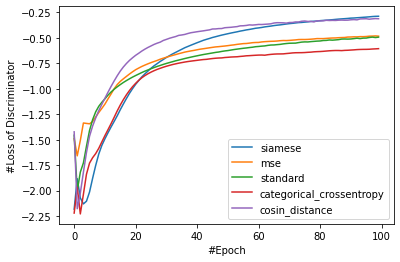

In [3]:
#fashion_mnist data
G_loss_siamess = np.array([-2.4315906, -2.1331897, -2.321548, -2.3804388, -2.3539028, -2.2636497, -2.129275, -2.002728, -1.8909539, -1.8062121, -1.74143, -1.6820577, -1.6253078, -1.5709189, -1.515618, -1.4556855, -1.3996624, -1.3459942, -1.2947004, -1.248627, -1.2063515, -1.1696393, -1.1342409, -1.1044245, -1.076409, -1.0487788, -1.0246302, -1.0036086, -0.98196644, -0.96277666, -0.9431148, -0.9255804, -0.9087242, -0.8933309, -0.8778089, -0.8626756, -0.8473329, -0.83485466, -0.8223675, -0.8102997, -0.79824877, -0.78681177, -0.7749883, -0.7656247, -0.7566639, -0.74695617, -0.73936945, -0.73126096, -0.7235354, -0.71675825, -0.70994806, -0.7032829, -0.6971931, -0.69124687, -0.6844498, -0.6789155, -0.6726798, -0.66798717, -0.66237736, -0.65647155, -0.6528721, -0.648612, -0.6429576, -0.63905215, -0.6349717, -0.6301036, -0.62627125, -0.6232726, -0.61901796, -0.61481714, -0.6109566, -0.60807097, -0.60435826, -0.60089153, -0.5993295, -0.596326, -0.5936085, -0.5897545, -0.5872976, -0.585894, -0.5817717, -0.57949436, -0.57740134, -0.57516325, -0.57244676, -0.56952596, -0.5666571, -0.5644855, -0.56232023, -0.5600092, -0.556959, -0.55576605, -0.553391, -0.5513494, -0.5489548, -0.5468122, -0.5443498, -0.54149044, -0.53948027, -0.5385366])
G_loss_mse = np.array([-1.4909487, -1.6586901, -1.5082911, -1.3363042, -1.3403572, -1.3440782, -1.321936, -1.2767773, -1.2335056, -1.1933798, -1.150977, -1.1001985, -1.051493, -1.0005214, -0.95930403, -0.92805505, -0.90266234, -0.8788263, -0.8553222, -0.8336155, -0.8133242, -0.79701674, -0.7813611, -0.7680114, -0.7553184, -0.74349415, -0.7327886, -0.72246176, -0.7101924, -0.7002873, -0.69103783, -0.6819213, -0.6731642, -0.6647681, -0.65616757, -0.64838, -0.64034927, -0.6344432, -0.6286565, -0.62358457, -0.6174354, -0.6117472, -0.60745996, -0.6029302, -0.5982898, -0.5937941, -0.58959264, -0.5870176, -0.5838019, -0.5807337, -0.5770479, -0.5728165, -0.56935185, -0.5645038, -0.56095827, -0.5572657, -0.55593026, -0.5523902, -0.5481539, -0.54615074, -0.54552954, -0.54069513, -0.5379137, -0.5360532, -0.5345465, -0.5336684, -0.53176993, -0.5285398, -0.5266919, -0.5273162, -0.5255543, -0.52309537, -0.5207017, -0.5172422, -0.51657444, -0.5168342, -0.5157175, -0.5137511, -0.5112059, -0.50772154, -0.50814366, -0.50804806, -0.50597024, -0.50378275, -0.502138, -0.5015529, -0.49917656, -0.4978394, -0.49687415, -0.49277613, -0.49218032, -0.49053344, -0.49101225, -0.488569, -0.4889561, -0.48735067, -0.48402935, -0.48334855, -0.4816626, -0.48379973])
G_loss_standard = np.array([-1.4562919, -2.0026624, -1.8190057, -1.7286763, -1.5644109, -1.409232, -1.3037878, -1.2267749, -1.172593, -1.1331446, -1.0990146, -1.0630956, -1.0321157, -1.0051116, -0.9812957, -0.9593606, -0.93857425, -0.9199846, -0.9024108, -0.8856356, -0.8703043, -0.85573435, -0.8410651, -0.82764065, -0.8154769, -0.8035059, -0.7920167, -0.7809545, -0.7711758, -0.7611285, -0.7517485, -0.7431477, -0.73465526, -0.7259701, -0.7186142, -0.7111766, -0.7034767, -0.69632936, -0.689553, -0.68296856, -0.676743, -0.6704808, -0.6644261, -0.6592506, -0.6540449, -0.6488115, -0.64351076, -0.6396175, -0.63376963, -0.6290307, -0.62546355, -0.6203865, -0.6152722, -0.6111586, -0.60705966, -0.60310614, -0.5998425, -0.5958364, -0.5925328, -0.5875424, -0.58515227, -0.5820724, -0.57968515, -0.5745344, -0.57110125, -0.570246, -0.56725144, -0.5646036, -0.55989236, -0.556364, -0.5536148, -0.5528752, -0.5523755, -0.5470997, -0.54236656, -0.5403116, -0.54086083, -0.5375332, -0.53511244, -0.53267586, -0.5313035, -0.52668417, -0.5256645, -0.5214883, -0.5233294, -0.5208898, -0.5181026, -0.51258355, -0.51185805, -0.51288956, -0.5116663, -0.50811535, -0.504053, -0.50797457, -0.50339955, -0.50271857, -0.49693862, -0.49337286, -0.4976108, -0.4938028])
G_loss_categorical_crossentropy = np.array([-2.2204278, -1.9665614, -2.228632, -2.0367143, -1.8390127, -1.729748, -1.6770533, -1.6366024, -1.5847423, -1.5221629, -1.4603869, -1.4020443, -1.3429135, -1.2811234, -1.2179831, -1.1598982, -1.1072817, -1.0594866, -1.0171013, -0.9796427, -0.9468409, -0.9176019, -0.89247, -0.87124467, -0.85293525, -0.83704436, -0.82273746, -0.8100898, -0.7992413, -0.7887468, -0.77924067, -0.77073437, -0.76265657, -0.7557734, -0.74920803, -0.7434588, -0.7379518, -0.7330995, -0.72891533, -0.7249888, -0.72118735, -0.7172384, -0.7137283, -0.7115675, -0.7074048, -0.70359385, -0.7006485, -0.6985274, -0.69743615, -0.6935765, -0.6914171, -0.6888781, -0.6874148, -0.6861825, -0.6828918, -0.68039125, -0.67688316, -0.675325, -0.6732667, -0.67140824, -0.6697744, -0.6692544, -0.67105216, -0.6661913, -0.66280067, -0.6602902, -0.65872324, -0.658404, -0.65780276, -0.65463656, -0.6519465, -0.64862645, -0.6467537, -0.64635545, -0.6459807, -0.6447451, -0.6425414, -0.6408926, -0.637675, -0.6359679, -0.6348628, -0.6327688, -0.63012093, -0.6275792, -0.6258822, -0.62462336, -0.6247454, -0.6258762, -0.6234819, -0.6223117, -0.6203637, -0.6184331, -0.6159198, -0.6145313, -0.6137684, -0.6134844, -0.61249346, -0.6101049, -0.60858923, -0.6067211])
G_loss_cosin_distance = np.array([-1.4229987, -2.177485, -2.0249913, -1.820288, -1.6259375, -1.4662081, -1.3664825, -1.2869529, -1.2156093, -1.1527212, -1.0938122, -1.0344567, -0.9776116, -0.92383945, -0.8729988, -0.82659763, -0.7866215, -0.75219727, -0.72178763, -0.69578695, -0.67198586, -0.65163636, -0.63021016, -0.61158836, -0.5947743, -0.57992005, -0.56494355, -0.55283636, -0.5426033, -0.5260942, -0.5157545, -0.504683, -0.496005, -0.48795187, -0.4764949, -0.47234207, -0.46683627, -0.45783937, -0.45018512, -0.44545245, -0.44044423, -0.43609267, -0.43191326, -0.42698428, -0.4223821, -0.41367412, -0.4130676, -0.4097536, -0.40912876, -0.40125492, -0.39894292, -0.39693752, -0.39339757, -0.39033547, -0.38281062, -0.38187963, -0.37876156, -0.37342483, -0.37517712, -0.3725503, -0.3689759, -0.3696384, -0.3675879, -0.36540443, -0.36268988, -0.35490692, -0.35177392, -0.3522918, -0.3531072, -0.3560162, -0.35016215, -0.34977454, -0.34439042, -0.34494856, -0.3375471, -0.33526754, -0.33949286, -0.33916536, -0.34422928, -0.3330938, -0.33448052, -0.33345467, -0.32835308, -0.33026263, -0.32910985, -0.32983857, -0.32734987, -0.32619214, -0.32746646, -0.32691336, -0.32327375, -0.321445, -0.32395238, -0.31508866, -0.31397972, -0.312954, -0.31761163, -0.31405085, -0.31158888, -0.31304115])
epoch = 100
chart_dir = './chart/'
plt.plot(np.arange(epoch), G_loss_siamess+0.25, label='siamese')
plt.plot(np.arange(epoch), G_loss_mse, label='mse')
plt.plot(np.arange(epoch), G_loss_standard, label='standard')
plt.plot(np.arange(epoch), G_loss_categorical_crossentropy, label='categorical_crossentropy')
plt.plot(np.arange(epoch), G_loss_cosin_distance, label='cosin_distance')
plt.xlabel('#Epoch')
plt.ylabel('#Loss of Discriminator')
plt.legend()
plt.savefig(os.path.join(chart_dir, 'compare_G_fashion_mnist.png'))

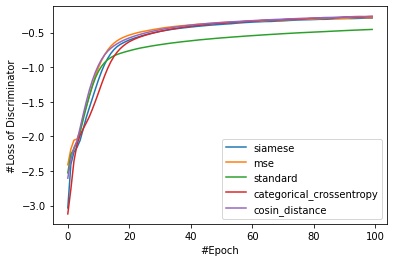

In [3]:
# mnist data
G_loss_siamess = [-3.0337822, -2.405122, -2.2272274, -2.1595292, -2.0586724, -1.8956466, -1.7293581, -1.5877156, -1.4505074, -1.3127055, -1.179617, -1.0596203, -0.95693076, -0.87180275, -0.80200183, -0.74678546, -0.70447415, -0.67288846, -0.6484938, -0.6269847, -0.60755384, -0.5908335, -0.57584655, -0.56206363, -0.5479249, -0.5353234, -0.5234371, -0.51233333, -0.50164187, -0.49274558, -0.48340255, -0.47494227, -0.46748123, -0.45995235, -0.45261964, -0.44687796, -0.44056082, -0.43498516, -0.42970055, -0.4253283, -0.42013353, -0.4160382, -0.41094697, -0.4067313, -0.40256643, -0.39852852, -0.39442015, -0.39097485, -0.38807657, -0.38443077, -0.38173676, -0.37773556, -0.37518585, -0.3727281, -0.36814645, -0.36415955, -0.36071542, -0.35727158, -0.3543216, -0.35208777, -0.34914953, -0.346901, -0.34506974, -0.34332725, -0.34102148, -0.34010726, -0.3395512, -0.33672443, -0.33390483, -0.3326572, -0.33055526, -0.3281816, -0.32512006, -0.3230385, -0.32012773, -0.31831816, -0.31670552, -0.3153305, -0.31440872, -0.31378484, -0.3120593, -0.31058425, -0.30840084, -0.30884954, -0.30824834, -0.30563635, -0.3032007, -0.30072185, -0.29949203, -0.29814675, -0.29813665, -0.29721764, -0.2976078, -0.2972261, -0.2959743, -0.2942237, -0.29247195, -0.29086268, -0.2903492, -0.29008278]
G_loss_mse = [-2.4105318, -2.1835139, -2.0547256, -2.038969, -1.9224032, -1.7127409, -1.570505, -1.4158919, -1.2612289, -1.1206065, -1.0019292, -0.9021655, -0.8187922, -0.7508084, -0.6963783, -0.65388083, -0.61965746, -0.5924967, -0.57047135, -0.552161, -0.53601426, -0.5223007, -0.5097139, -0.49828944, -0.48844355, -0.47978103, -0.47128004, -0.46279895, -0.45480382, -0.44750208, -0.4397449, -0.43302447, -0.42655006, -0.42098138, -0.4158585, -0.4104612, -0.40601993, -0.40137318, -0.3975851, -0.39327815, -0.3891348, -0.3856006, -0.38145226, -0.377269, -0.3741673, -0.37069294, -0.36786813, -0.36559007, -0.36495918, -0.35987994, -0.35680428, -0.35439163, -0.35163763, -0.35013026, -0.3487489, -0.34570593, -0.34195307, -0.33794093, -0.33486837, -0.33317378, -0.33167946, -0.33044845, -0.32874215, -0.33190656, -0.32793903, -0.32518864, -0.32209405, -0.32050422, -0.32124725, -0.31931666, -0.3167782, -0.3147679, -0.31348315, -0.31152794, -0.3093388, -0.30911416, -0.3088759, -0.30701166, -0.30734664, -0.3063308, -0.30300042, -0.30068797, -0.2985457, -0.29629982, -0.294999, -0.29338852, -0.2928661, -0.29368466, -0.29556566, -0.2950845, -0.29400668, -0.2923407, -0.2888543, -0.28578752, -0.28402737, -0.28237304, -0.2831463, -0.28504127, -0.2860436, -0.28418863]
G_loss_standard = [-2.5272303, -2.2599187, -2.1803277, -2.0794744, -1.9378928, -1.7589669, -1.582489, -1.4194955, -1.2739793, -1.1528821, -1.0581777, -0.98658675, -0.93271124, -0.8916829, -0.86048824, -0.83654517, -0.8170616, -0.80165935, -0.78761476, -0.7747015, -0.762785, -0.7508714, -0.73992175, -0.7295304, -0.7202683, -0.71247536, -0.70404977, -0.69621277, -0.688843, -0.6816759, -0.6751272, -0.6686966, -0.6619889, -0.65583944, -0.64985627, -0.64469385, -0.6391457, -0.63380116, -0.6287301, -0.6239458, -0.61932033, -0.6143306, -0.60946244, -0.60461557, -0.60089755, -0.5964616, -0.5928352, -0.5885878, -0.5843552, -0.5808906, -0.57694566, -0.5738749, -0.57032293, -0.56671834, -0.5634334, -0.5602523, -0.5571784, -0.5535208, -0.55014426, -0.54757977, -0.544408, -0.5414751, -0.53860646, -0.5354983, -0.5326768, -0.5298487, -0.527196, -0.524459, -0.5218472, -0.5192527, -0.5163674, -0.51365304, -0.51139826, -0.5090391, -0.5063368, -0.5040301, -0.50153357, -0.49979818, -0.4975401, -0.49553615, -0.49315116, -0.49138528, -0.48924616, -0.48705134, -0.48483506, -0.48245937, -0.4804354, -0.4779648, -0.47630227, -0.473645, -0.47159603, -0.46977624, -0.46765912, -0.46548533, -0.46415552, -0.4619837, -0.46034828, -0.45841053, -0.4565723, -0.45465466]
G_loss_categorical_crossentropy = [-3.1205888, -2.7630827, -2.3588722, -2.118352, -1.9847388, -1.8912618, -1.8060253, -1.715695, -1.6067297, -1.4893035, -1.3664254, -1.241955, -1.1223407, -1.0145011, -0.9218984, -0.84592104, -0.78460133, -0.7350798, -0.69425493, -0.6606345, -0.632211, -0.6094243, -0.5891188, -0.57142335, -0.5556517, -0.5411896, -0.5280137, -0.51560223, -0.504389, -0.49344072, -0.4826143, -0.47320685, -0.46378908, -0.4553788, -0.44720876, -0.44021377, -0.43403, -0.42710307, -0.4197375, -0.41328603, -0.4079501, -0.402446, -0.39719403, -0.39348733, -0.3890944, -0.3829748, -0.37862396, -0.373414, -0.36933038, -0.3663362, -0.36476684, -0.36412042, -0.35844895, -0.35335875, -0.35025305, -0.34826472, -0.3450846, -0.34283757, -0.33992964, -0.33673805, -0.33456054, -0.33354107, -0.32994014, -0.32419357, -0.32138726, -0.31879297, -0.31728297, -0.31707415, -0.31807286, -0.31557107, -0.31422725, -0.30943155, -0.30688924, -0.3055466, -0.30613232, -0.30378276, -0.30421436, -0.30256864, -0.29921442, -0.29425752, -0.29178128, -0.28865615, -0.2867059, -0.28443003, -0.28507835, -0.28613734, -0.28928292, -0.28608796, -0.2836157, -0.27962846, -0.27453175, -0.27270412, -0.27229053, -0.27391356, -0.27543497, -0.27417037, -0.27468252, -0.27084476, -0.26923418, -0.26807952]
G_loss_cosin_distance = [-2.6039267, -2.3326259, -2.1641064, -2.0632908, -1.8786125, -1.6868235, -1.501532, -1.3328419, -1.1897135, -1.0700488, -0.96952987, -0.88648033, -0.8208871, -0.7682911, -0.7264326, -0.6923106, -0.6627947, -0.6376121, -0.6151135, -0.59536767, -0.5774559, -0.5615176, -0.54639345, -0.5330064, -0.5203411, -0.50815487, -0.4967557, -0.48633763, -0.47677103, -0.4674944, -0.45838037, -0.44971445, -0.44185984, -0.434984, -0.42773673, -0.42138112, -0.41521564, -0.4089816, -0.4033185, -0.39796975, -0.3926715, -0.38780138, -0.38328207, -0.37963527, -0.37520155, -0.37126473, -0.36825308, -0.36390087, -0.36030084, -0.35682052, -0.35400084, -0.35072535, -0.34759346, -0.34548092, -0.34282362, -0.3404916, -0.33825904, -0.33552343, -0.3324818, -0.33006293, -0.32784745, -0.3251617, -0.3225498, -0.32046425, -0.3181267, -0.31615892, -0.31408527, -0.31170458, -0.3099278, -0.30847877, -0.305833, -0.30376187, -0.30120942, -0.30024466, -0.29881626, -0.29687175, -0.29493818, -0.2931908, -0.29186434, -0.2905026, -0.28900135, -0.28806782, -0.28692698, -0.2851607, -0.28320462, -0.2817182, -0.2809638, -0.2789283, -0.27841768, -0.2769785, -0.27496833, -0.27301726, -0.27135828, -0.2694082, -0.26783225, -0.26714477, -0.2677342, -0.26784232, -0.26615202, -0.26414436]
epoch = 100
chart_dir = './chart/'
plt.plot(np.arange(epoch), G_loss_siamess, label='siamese')
plt.plot(np.arange(epoch), G_loss_mse, label='mse')
plt.plot(np.arange(epoch), G_loss_standard, label='standard')
plt.plot(np.arange(epoch), G_loss_categorical_crossentropy, label='categorical_crossentropy')
plt.plot(np.arange(epoch), G_loss_cosin_distance, label='cosin_distance')
plt.xlabel("#Epoch")
plt.ylabel("#Loss of Discriminator")
plt.legend()
plt.savefig(os.path.join(chart_dir, 'compare_G.png'))